In [122]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

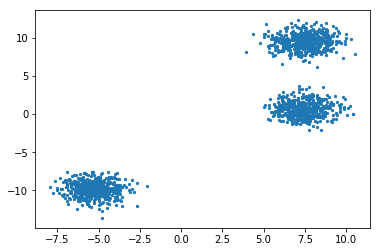

In [124]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [125]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['MiniBatchKMeans', 'KMeans'], n_evaluations=30, seed=27)

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 20], Default: 10
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    batch_size___MiniBatchKMeans | algorithm_choice in {'MiniBatchKMeans'}
    n_clusters___KMeans | algorithm_choice in {'KMeans'}
    n_clusters___MiniBatchKMeans | algorithm_choice in {'MiniBatchKMeans'}

Optimization is complete, the optimal configuration is 
Configuration:
  algorithm_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 3



In [126]:
opt_result

Configuration:
  algorithm_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 3

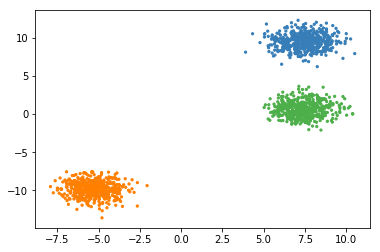

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [127]:
autocluster.predict(X)

In [128]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'MiniBatchKMeans'
   batch_size___MiniBatchKMeans, Value: 100
   n_clusters___MiniBatchKMeans, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=9.34600830078125e-05),
 TrajEntry(train_perf=-0.33550100160999013, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'MiniBatchKMeans'
   batch_size___MiniBatchKMeans, Value: 100
   n_clusters___MiniBatchKMeans, Value: 10
 , ta_runs=1, ta_time_used=0.13347625732421875, wallclock_time=0.1436328887939453),
 TrajEntry(train_perf=-0.34738414753097124, incumbent_id=2, incumbent=Configuration:
   algorithm_choice, Value: 'MiniBatchKMeans'
   batch_size___MiniBatchKMeans, Value: 18
   n_clusters___MiniBatchKMeans, Value: 7
 , ta_runs=4, ta_time_used=0.6043252944946289, wallclock_time=1.0301856994628906),
 TrajEntry(train_perf=-0.6725744346706012, incumbent_id=3, incumbent=Configuration:
   algorithm_choice, Value: 'KMeans'
  

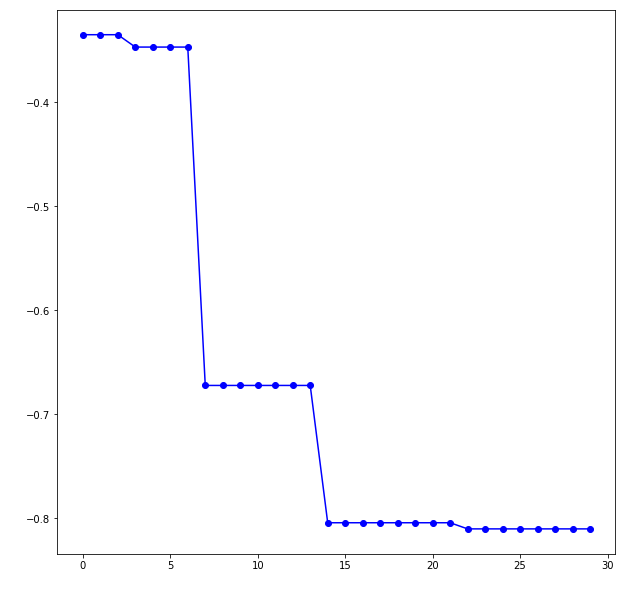

In [129]:
autocluster.plot_convergence()